# Binary Classification ML Case Study Project

We are going to work through a case study classification predictive modeling problem in python. The process will use data transforms, algorithm tuning, ensemble and tuning of ensemble methods to improve model performance.

# Problem Definition
In this project we will be focused on the Sonar Mines vs Rocks dataset. The problem is to predict metal or rock objects from sonar return data. Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The label associated with each record contains the letter *R* if the object is a rock and *M* if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

## Loading the Dataset

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
plt.style.use('ggplot')
%matplotlib inline

# load dataset
filename = 'sonar.csv'
names = ["col" + str(i) for i in range(0, 61)]
# names = [ col1, col2, col3, col4, col5, col6, col7, col8, col9, col10, .... , col60 ]
dataset = pd.read_csv(filename, names=names)

## Analyze Data
Let's take a closer look at our dataset.

### Descriptive Statistics
When we look at the dimension of the dataset, we have 208 features to work with and can confirm the data has 61 attributes including the class attribute.

In [2]:
# shape
dataset.shape

(208, 61)

Looking at the data types of each feature, we can see that all of the features are numeric (float) and that the class value has been read in as an object.

In [3]:
# types
pd.options.display.max_columns = 999 
pd.options.display.max_rows = 999
dataset.dtypes

col0     float64
col1     float64
col2     float64
col3     float64
col4     float64
col5     float64
col6     float64
col7     float64
col8     float64
col9     float64
col10    float64
col11    float64
col12    float64
col13    float64
col14    float64
col15    float64
col16    float64
col17    float64
col18    float64
col19    float64
col20    float64
col21    float64
col22    float64
col23    float64
col24    float64
col25    float64
col26    float64
col27    float64
col28    float64
col29    float64
col30    float64
col31    float64
col32    float64
col33    float64
col34    float64
col35    float64
col36    float64
col37    float64
col38    float64
col39    float64
col40    float64
col41    float64
col42    float64
col43    float64
col44    float64
col45    float64
col46    float64
col47    float64
col48    float64
col49    float64
col50    float64
col51    float64
col52    float64
col53    float64
col54    float64
col55    float64
col56    float64
col57    float64
col58    float

Peeking at the first 20 rows of the data. This does not show all of the columns, but we can see all of the data has the same scale. We can also see that the class label (60) has string values.

In [4]:
dataset.head(20)

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40,col41,col42,col43,col44,col45,col46,col47,col48,col49,col50,col51,col52,col53,col54,col55,col56,col57,col58,col59,col60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,0.2988,0.4250,0.6343,0.8198,1.0000,0.9988,0.9508,0.9025,0.7234,0.5122,0.2074,0.3985,0.5890,0.2872,0.2043,0.5782,0.5389,0.3750,0.3411,0.5067,0.5580,0.4778,0.3299,0.2198,0.1407,0.2856,0.3807,0.4158,0.4054,0.3296,0.2707,0.2650,0.0723,0.1238,0.1192,0.1089,0.0623,0.0494,0.0264,0.0081,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,0.1786,0.0658,0.0513,0.3752,0.5419,0.5440,0.5150,0.4262,0.2024,0.4233,0.7723,0.9735,0.9390,0.5559,0.5268,0.6826,0.5713,0.5429,0.2177,0.2149,0.5811,0.6323,0.2965,0.1873,0.2969,0.5163,0.6153,0.4283,0.5479,0.6133,0.5017,0.2377,0.1957,0.1749,0.1304,0.0597,0.1124,0.1047,0.0507,0.0159,0.0195,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,0.2802,0.3086,0.2657,0.3801,0.5626,0.4376,0.2617,0.1199,0.6676,0.9402,0.7832,0.5352,0.6809,0.9174,0.7613,0.8220,0.8872,0.6091,0.2967,0.1103,0.1318,0.0624,0.0990,0.4006,0.3666,0.1050,0.1915,0.3930,0.4288,0.2546,0.1151,0.2196,0.1879,0.1437,0.2146,0.2360,0.1125,0.0254,0.0285,0.0178,0.0052,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,0.1156,0.1654,0.3833,0.3598,0.1713,0.1136,0.0349,0.3796,0.7401,0.9925,0.9802,0.8890,0.6712,0.4286,0.3374,0.7366,0.9611,0.7353,0.4856,0.1594,0.3007,0.4096,0.3170,0.3305,0.3408,0.21

Let's summarize the distribution of each feature.

In [5]:
# descriptions, change precision to 3 places
pd.set_option('precision', 3)
dataset.describe()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40,col41,col42,col43,col44,col45,col46,col47,col48,col49,col50,col51,col52,col53,col54,col55,col56,col57,col58,col59
count,208.000,2.080e+02,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,2.080e+02,2.080e+02,208.000,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02
mean,0.029,3.844e-02,0.044,0.054,0.075,0.105,0.122,0.135,0.178,0.208,0.236,0.250,0.273,0.297,0.320,0.378,0.416,0.452,0.505,0.563,0.609,0.624,0.647,0.673,0.675,0.700,0.702,0.694,0.642,0.581,0.504,0.439,0.417,0.403,0.393,0.385,0.364,0.340,0.326,0.311,0.289,0.278,0.247,0.214,0.197,0.161,0.122,0.091,0.052,0.020,0.016,1.342e-02,1.071e-02,0.011,9.290e-03,8.222e-03,7.820e-03,7.949e-03,7.941e-03,6.507e-03
std,0.023,3.296e-02,0.038,0.047,0.056,0.059,0.062,0.085,0.118,0.134,0.133,0.140,0.141,0.164,0.205,0.233,0.264,0.262,0.258,0.263,0.258,0.256,0.250,0.239,0.245,0.237,0.246,0.237,0.240,0.221,0.214,0.213,0.207,0.231,0.259,0.264,0.240,0.213,0.199,0.179,0.171,0.169,0.139,0.133,0.152,0.134,0.087,0.062,0.036,0.014,0.012,9.634e-03,7.060e-03,0.007,7.088e-03,5.736e-03,5.785e-03,6.470e-03,6.181e-03,5.031e-03
min,0.002,6.000e-04,0.002,0.006,0.007,0.010,0.003,0.005,0.007,0.011,0.029,0.024,0.018,0.027,0.003,0.016,0.035,0.037,0.049,0.066,0.051,0.022,0.056,0.024,0.024,0.092,0.048,0.028,0.014,0.061,0.048,0.040,0.048,0.021,0.022,0.008,0.035,0.038,0.037,0.012,0.036,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,8.000e-04,5.000e-04,0.001,6.000e-04,4.000e-04,3.000e-04,3.000e-04,1.000e-04,6.000e-04
25%,0.013,1.645e-02,0.019,0.024,0.038,0.067,0.081,0.080,0.097,0.111,0.129,0.133,0.166,0.175,0.165,0.196,0.206,0.242,0.299,0.351,0.400,0.407,0.450,0.541,0.526,0.544,0.532,0.535,0.464,0.411,0.346,0.281,0.258,0.218,0.179,0.154,0.160,0.174,0.174,0.186,0.163,0.159,0.155,0.127,0.094,0.069,0.064,0.045,0.026,0.012,0.008,7.275e-03,5.075e-03,0.005,4.150e-03,4.400e-03,3.700e-03,3.600e-03,3.675e-03,3.100e-03
50%,0.023,3.080e-02,0.034,0.044,0.062,0.092,0.107,0.112,0.152,0.182,0.225,0.249,0.264,0.281,0.282,0.305,0.308,0.368,0.435,0.542,0.618,0.665,0.700,0.699,0.721,0.754,0.746,0.732,0.681,0.607,0.490,0.430,0.391,0.351,0.313,0.321,0.306,0.313,0.283,0.278,0.260,0.245,0.223,0.178,0.148,0.121,0.102,0.078,0.045,0.018,0.014,1.140e-02,9.550e-03,0.009,7.500e-03,6.850e-03,5.950e-03,5.800e-03,6.400e-03,5.300e-03
75%,0.036,4.795e-02,0.058,0.065,0.100,0.134,0.154,0.170,0.233,0.269,0.302,0.331,0.351,0.386,0.453,0.536,0.659,0.679,0.731,0.809,0.817,0.832,0.849,0.872,0.874,0.894,0.917,0.900,0.852,0.735,0.642,0.580,0.556,0.596,0.593,0.557,0.519,0.441,0.435,0.424,0.388,0.384,0.325,0.272,0.232,0.200,0.154,0.120,0.069,0.025,0.021,1.673e-02,1.490e-02,0.015,1.210e-02,1.058e-02,1.043e-02,1.035e-02,1.033e-02,8.525e-03
max,0.137,2.339e-01,0.306,0.426,0.401,0.382,0.373,0.459,0.683,0.711,0.734,0.706,0.713,0.997,1.000,0.999,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.966,0.931,1.000,0.965,1.000,1.000,0.950,1.000,0.986,0.930,0.899,0.825,0.773,0.776,0.703,0.729,0.552,0.334,0.198,0.083,0.100,7.090e-02,3.900e-02,0.035,4.470e-02,3.940e-02,3.550e-02,4.400e-02,3.640e-02,4.390e-02


Again, as we expect, the dataset has the same range, but interestingly differing mean values. There may be some benefit from standardising the data.

Looking at the breakdown of the class values. We can see that the classes are reasonably balanced between M (mines) and R (rocks).

In [6]:
# class distribution
dataset['col60'].value_counts()

M    111
R     97
Name: col60, dtype: int64

### Unimodal Data Visualisations
Let's look at visualisations of individual features. It is often useful to look at your data using multiple different visualisations in order to spark ideas. Let's look at histograms of each feature to get a sense of the data distributions.

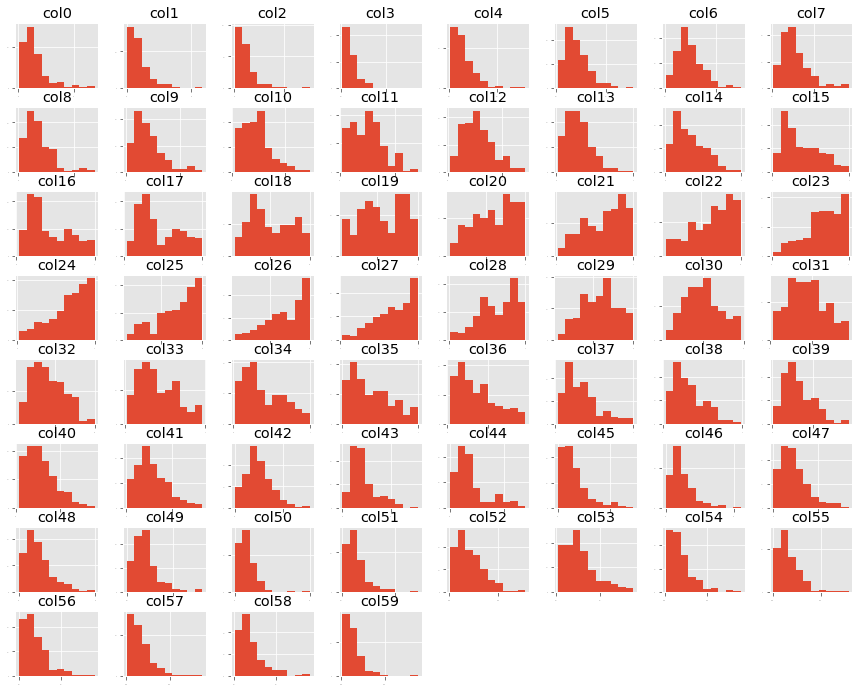

In [7]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(15,12))
plt.show()

We can see that there are a lot of Gaussian-like distributions and perhaps some exponential-like distributions for other features.

Let's take a look at the same perspective of the data using density plots.

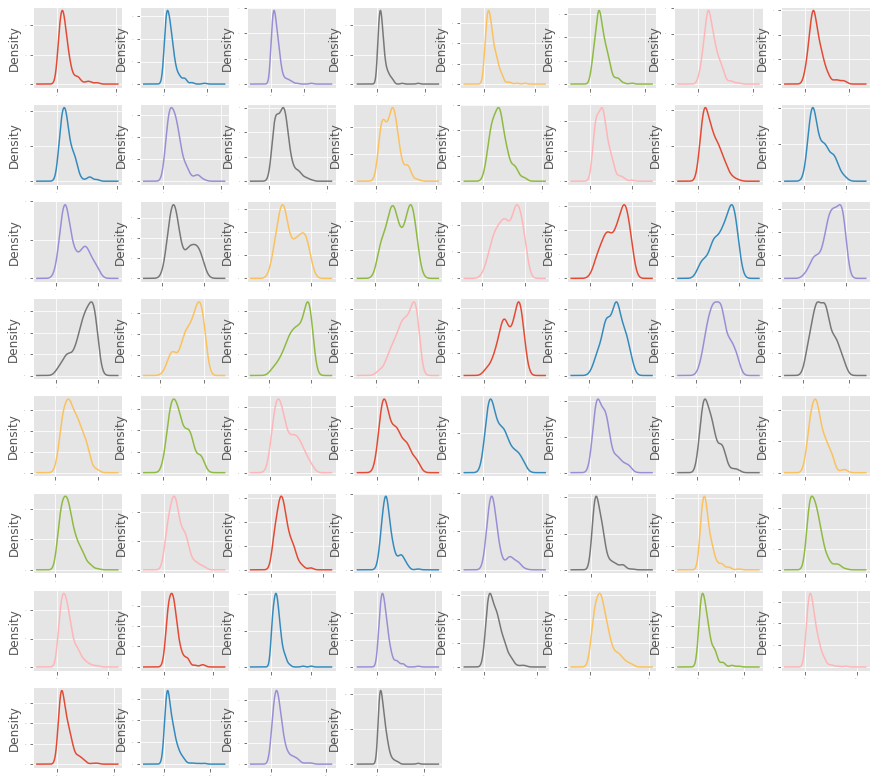

In [8]:
# Univariate Density Plots
dataset.plot(kind='density', subplots=True, layout=(8,8), figsize=(15,14), sharex=False, legend=False, fontsize=1)
plt.show()

This is useful, you can see that many of the features have a skewed distribution. A power transform like a Box-Cox transform that can correct for the skew in distributions might be useful.

It is always good to look at box and whisker plots of numeric features to get an idea of the spread of values.

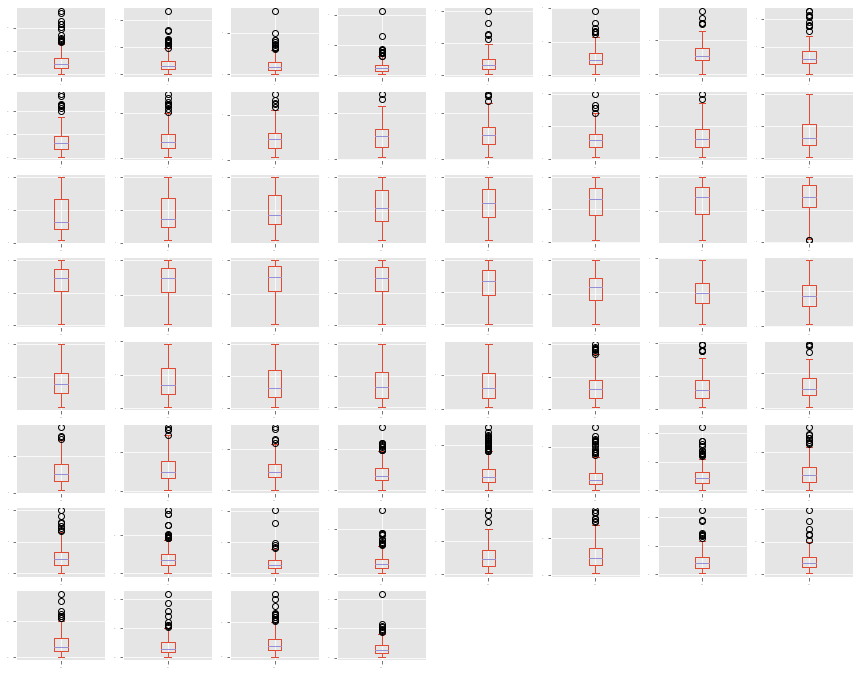

In [9]:
# Univariate box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False, fontsize=1, figsize=(15,12))
plt.show()

We can see that features do have quite different spreads. Given the scales are the same, it may suggest some benefit in standardising the data for modeling to get all of the means lined up.

### Multimodal Data Visualizations
Let's visualise the correlations between the features.

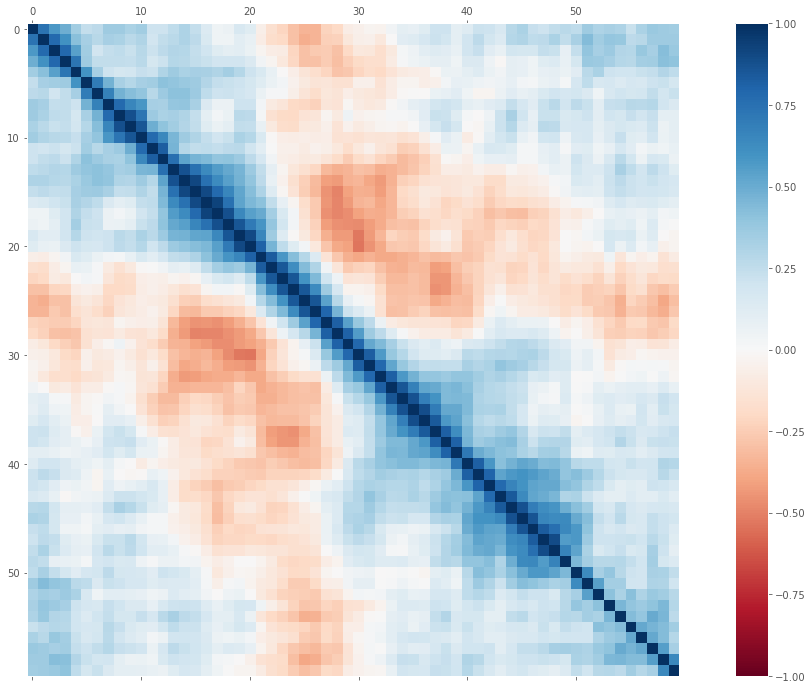

In [10]:
# Correction Matrix Plot
plt.rcParams['axes.grid'] = False 
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none', cmap='RdBu')
fig.colorbar(cax)
plt.show()

It looks like there is also some structure in the order of the features. The blue around the diagonal suggests that features that are next to each other are generally more correlated with each other. The red patches also suggest some moderate negative correlation the further features are away from each other in the ordering. This makes sense if the order of the features refers to the angle of sensors for the sonar chirp.

## Validation Dataset
We're now going to split our data into training and validation hold-out set. Validation hold-out set is a sample of data that we hold back from our analysis and modeling. We will use it right at the end of our project to confirm the accuracy of our final model. Validation let's us know if we messed up and to give us confidence on our estimates of accuracy on unseen data. We will use 80% of the dataset for modeling and hold back 20% for validation.

In [11]:
# Split-out validation dataset
from sklearn.model_selection import train_test_split # import a library for splitting the dataset
array = dataset.values
X = array[:,0:60].astype(float)
Y = array[:,60]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

## Evaluate Algorithms: Baseline
We have no idea what algorithm will do well on this problem. So, we'll design a test harness where we use 10-fold cross validation. The dataset is not too small and this is a good standard test harness configuration. We will evaluate the algorithms using the *accuracy* metric. This is a gross metric that will give a quick idea of how correct a given model is. More useful on binary classification problems like this one.

In [12]:
# Test options and evaluation metric
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10
seed = 7
scoring = 'accuracy'

Let's create a baseline of performance on this problem and spot-check a number of different algorithms. We will select a suite of different algorithms capable of working on this classification problem. The six algorithms selected include:
* Linear Algorithms: Logistic Regression (LR) and Linear Discriminant Analysis (LDA).
* Nonlinear Algorithms: Classification and Regression Trees (CART), Support Vector Machines (SVM), Gaussian Naive Bayes (NB) and k-Nearest Neighbors (KNN).

In [13]:
# load models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

The algorithms all use default tuning parameters. Let's compare the algorithms. We will display the mean and standard deviation of accuracy for each algorithm as we calculate it and collect the results for use later.

In [14]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.777574 (0.088423)
LDA: 0.778676 (0.093570)
KNN: 0.758824 (0.106417)
CART: 0.715809 (0.129775)
NB: 0.682721 (0.136040)
SVM: 0.765074 (0.087519)


The results are quiet close and they suggest both Logistic Regression and Linear Discriminant Analysis may be worth further study.

These are just mean accuracy values. It is always wise to look at the distribution of accuracy values calculated across cross validation folds. We can do that graphically using box and whisker plots.

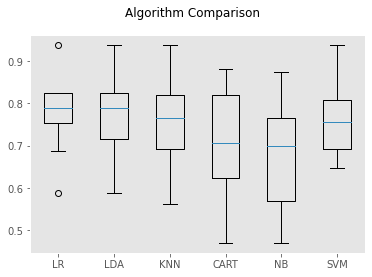

In [15]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The results show a nice distribution for LDA, KNN whilst showing low variance for LR. The SVM results look good too.

It is possible that the varied distribution of the features is having an effect on the accuracy of algorithms such as NB. In the next section we will repeat this spot-check with a standardised copy of the training dataset.

## Evaluate Algorithms: Standardise Data
We're now going to evaluate the algorithms with a standardised copy of the dataset. This is where the data is transformed such that each feature has a mean value of
zero and a standard deviation of 1. We also need to avoid data leakage when we transform the data. A good way to avoid leakage is to use pipelines that standardise the data and build the model for each fold in the cross validation test harness. That way we can get a fair estimation of how each model with standardised data might perform on unseen data.

In [16]:
# Standardise the dataset
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.754412 (0.067926)
ScaledLDA: 0.778676 (0.093570)
ScaledKNN: 0.808456 (0.107996)
ScaledCART: 0.758456 (0.098582)
ScaledNB: 0.682721 (0.136040)
ScaledSVM: 0.826103 (0.081814)


Running the code we can see that KNN is still doing well, even better than before. We can also see that the standardisation of the data has lifted the skill of SVM to be the most accurate algorithm tested so far.

Again, we should plot the distribution of the accuracy scores using box and whisker plots.

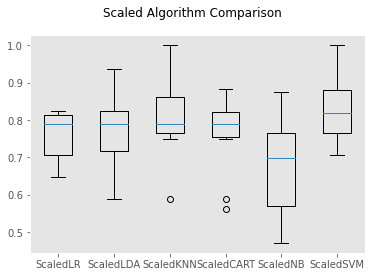

In [17]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The results suggest digging deeper into the SVM and KNN algorithms which have a strong mean and a spread that skews up towards high 100s (%) in accuracy. It is very likely that configuration beyond the default may yield even more accurate models.

# Algorithm Tuning
In this section we investigate tuning the parameters for two algorithms that show promise from the spot-checking in the previous section: KNN and SVM.

## Tuning KNN
We can start off by tuning the number of neighbors for KNN. The default number of neighbors is 5. Below we try all odd values of k from 1 to 21, covering the default value of 5. Each k value is evaluated using 10-fold cross validation on the training standardized dataset.

In [18]:
# KNN Algorithm tuning
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.836029 using {'n_neighbors': 1}
0.836029 (0.079487) with: {'n_neighbors': 1}
0.813603 (0.088021) with: {'n_neighbors': 3}
0.814338 (0.096870) with: {'n_neighbors': 5}
0.777574 (0.120387) with: {'n_neighbors': 7}
0.730147 (0.099376) with: {'n_neighbors': 9}
0.741544 (0.073970) with: {'n_neighbors': 11}
0.710662 (0.105829) with: {'n_neighbors': 13}
0.723162 (0.080983) with: {'n_neighbors': 15}
0.698897 (0.072669) with: {'n_neighbors': 17}
0.710662 (0.091337) with: {'n_neighbors': 19}
0.698897 (0.091195) with: {'n_neighbors': 21}


We can see that the optimal configuration is K=1. This is interesting as the algorithm will make predictions using the most similar instance in the training dataset alone.

## Tuning SVM
We can tune two key parameters of the SVM algorithm, the value of C (how much to relax the margin) and the type of *kernel*. The default for SVM (the SVC class) is to use the Radial Basis Function (RBF) kernel with a C value set to 1.0. Like with KNN, we will perform a grid search using 10-fold cross validation with a standardised copy of the training dataset. We will try a number of simpler kernel types and C values with less bias and more bias (less than and more than 1.0 respectively).

In [19]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.850000 using {'C': 1.7, 'kernel': 'rbf'}
0.748529 (0.069953) with: {'C': 0.1, 'kernel': 'linear'}
0.582721 (0.127062) with: {'C': 0.1, 'kernel': 'poly'}
0.601103 (0.184435) with: {'C': 0.1, 'kernel': 'rbf'}
0.712868 (0.116579) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.754412 (0.082337) with: {'C': 0.3, 'kernel': 'linear'}
0.644118 (0.099873) with: {'C': 0.3, 'kernel': 'poly'}
0.742279 (0.081853) with: {'C': 0.3, 'kernel': 'rbf'}
0.748529 (0.069953) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.765809 (0.070336) with: {'C': 0.5, 'kernel': 'linear'}
0.704779 (0.098225) with: {'C': 0.5, 'kernel': 'poly'}
0.784559 (0.068922) with: {'C': 0.5, 'kernel': 'rbf'}
0.760662 (0.065632) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.759926 (0.083206) with: {'C': 0.7, 'kernel': 'linear'}
0.759559 (0.093807) with: {'C': 0.7, 'kernel': 'poly'}
0.814338 (0.059832) with: {'C': 0.7, 'kernel': 'rbf'}
0.761029 (0.079602) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.765441 (0.066964) with: {'C': 0.9, 'kernel': 'linear'

We can see the most accurate configuration was *SVM* with an *RBF kernel* and a *C* value of 1.5. The accuracy 0.850% is seemingly better than what *KNN* could achieve.

## Ensemble Methods
Another way that we can improve the performance of algorithms on this problem is by using ensemble methods. In this section we will evaluate four different ensemble machine learning algorithms, two boosting and two bagging methods:
* **Boosting Methods**: AdaBoost (AB) and Gradient Boosting (GBM).
* **Bagging Methods**: Random Forests (RF) and Extra Trees (ET).

We will use the same test harness as before, 10-fold cross validation. No data standardisation is used in this case because all four ensemble algorithms are based on decision trees that are less sensitive to data distributions.

In [20]:
# load models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.782721 (0.072445)
GBM: 0.795956 (0.132458)
RF: 0.808088 (0.073065)
ET: 0.862132 (0.071502)


We can see that both bagging techniques provide strong accuracy scores in the low 80s (%) with default configurations. We can plot the distribution of accuracy scores across the cross validation folds.

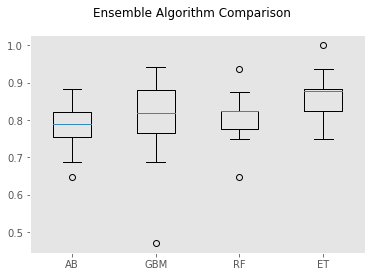

In [21]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The results suggest ET may be worthy of further study, with a strong mean and a spread that skews up towards high 100s (%) in accuracy.

We can probably do better, given that the ensemble techniques used the default parameters. In the next section we will look at tuning the Extra Trees to further lift the performance.

## Tune Ensemble Methods
The default number of boosting stages to perform (n estimators) is 100. This is a good candidate parameter of Extra Trees to tune. Often, the larger the number of boosting
stages, the better the performance but the longer the training time. In this section we will look at tuning the number of stages for Extra Trees. Below we define a parameter grid n estimators values from 50 to 400 in increments of 50. Each setting is evaluated using 10-fold cross validation.

In [22]:
# Tune scaled ET
# scaler = StandardScaler().fit(X_train)
# rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = ExtraTreesClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.873897 using {'n_estimators': 250}
0.837868 (0.059564) with: {'n_estimators': 50}
0.856250 (0.059451) with: {'n_estimators': 100}
0.862132 (0.052620) with: {'n_estimators': 150}
0.862132 (0.052620) with: {'n_estimators': 200}
0.873897 (0.073824) with: {'n_estimators': 250}
0.873897 (0.073824) with: {'n_estimators': 300}
0.873897 (0.073824) with: {'n_estimators': 350}
0.873897 (0.073824) with: {'n_estimators': 400}


We can see that the best configuration was n estimators=250 resulting in an accuracy of 0.873897, which is similar with the untuned method.

## Finalise Model
The ET showed the most promise as a low complexity and stable model for this problem which is very close to SVM. In this section we will finalise the model by training it on the entire training dataset and make predictions for the hold-out validation dataset to confirm our findings. Since no data standardisation was used. We will not do the calculation from the entire training dataset and apply the same transform to the input features from the validation dataset.

In [23]:
# prepare the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


model = ExtraTreesClassifier(random_state=seed, n_estimators=250)
model.fit(X_train, Y_train)
# estimate accuracy on validation dataset
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8809523809523809
[[25  2]
 [ 3 12]]
              precision    recall  f1-score   support

           M       0.89      0.93      0.91        27
           R       0.86      0.80      0.83        15

    accuracy                           0.88        42
   macro avg       0.88      0.86      0.87        42
weighted avg       0.88      0.88      0.88        42



We can see that we achieve an accuracy of nearly 88% on the held-out validation dataset. A score that matches closely to our expectations estimated above during the tuning of SVM.

# Conclusion
In this notebook we worked through a classification predictive modeling problem using python. We went through the process of using data transforms, algorithm tuning, ensemble and tuning of ensemble methods to improve model performance. Specifically, we covered the following steps:

* Problem Definition (Sonar return data).
* Loading the Dataset.
* Analyze Data (same scale but different distributions of data).
* Evaluate Algorithms (KNN looked good).
* Evaluate Algorithms with Standardization (KNN and SVM looked good).
* Algorithm Tuning (K=1 for KNN was good, SVM with an RBF kernel and C=1.5 was best).
* Ensemble Methods (Bagging and Boosting, in particular the ET was as good as SVM).
* Finalise Model (use all training data and confirm using validation dataset).
